# John Carl Atillo - BSCS 3

This experiment revolves on diabetes prediction. Dataset was gathered on https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset.
- Experiment with the number of hidden layers, and the number of units in the hidden layer.
- Try to experiment on the activation functions in the hidden layer https://www.tensorflow.org/api_docs/python/tf/keras/activations
- Try to experiment with the optimizer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- Check the accuracy, specificity, and sensitivity of your model.

In [3]:
# Import necessary modules
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
# Import the csv file (dataset)
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
dataset.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
pd.DataFrame(X, columns = ["gender", "age", "hypertension", "heart_disease", "smoking_history", "bmi", "HbA1c_level", "blood_glucose_level"])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [7]:
pd.DataFrame(y, columns = ["diabetes"])

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [8]:
X

array([['Female', 80.0, 0, ..., 25.19, 6.6, 140],
       ['Female', 54.0, 0, ..., 27.32, 6.6, 80],
       ['Male', 28.0, 0, ..., 27.32, 5.7, 158],
       ...,
       ['Male', 66.0, 0, ..., 27.83, 5.7, 155],
       ['Female', 24.0, 0, ..., 35.42, 4.0, 100],
       ['Female', 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [9]:
y

array([0, 0, 0, ..., 0, 0, 0])

# Encoding categorical data

Label Encoding the "Gender" column

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:,0])

In [11]:
print(X.shape)

(100000, 8)


In [12]:
print(X)

[[0 80.0 0 ... 25.19 6.6 140]
 [0 54.0 0 ... 27.32 6.6 80]
 [1 28.0 0 ... 27.32 5.7 158]
 ...
 [1 66.0 0 ... 27.83 5.7 155]
 [0 24.0 0 ... 35.42 4.0 100]
 [0 57.0 0 ... 22.43 6.6 90]]


One Hot Encoding the "smoking_history" column

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
print(X.shape)

(100000, 13)


In [15]:
print(X)

[[0.0 0.0 0.0 ... 25.19 6.6 140]
 [1.0 0.0 0.0 ... 27.32 6.6 80]
 [0.0 0.0 0.0 ... 27.32 5.7 158]
 ...
 [0.0 0.0 0.0 ... 27.83 5.7 155]
 [0.0 0.0 0.0 ... 35.42 4.0 100]
 [0.0 1.0 0.0 ... 22.43 6.6 90]]


Notice how the shape of X changes from (100000, 8) to (100000, 13)

This happens because of One-Hot Encoding, which expands categorical columns into multiple binary (0/1) columns — one for each possible category.

In this case:

The dataset initially had 8 columns — numeric and categorical mixed.

I used a ColumnTransformer with OneHotEncoder() on the column "smoking_history".

That column likely had 5 unique categories (e.g. "never", "current", "former", "ever", "No Info").

So the encoder replaced that single column with 5 new binary columns, each representing whether the sample belongs to that category.

# Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train.shape

(80000, 13)

In [18]:
X_test.shape

(20000, 13)

In [19]:
y_train.shape

(80000,)

In [20]:
y_test.shape

(20000,)

The dataset was split to an 80:20 ratio. 80% for training and 20% for the testing. We can confirm this just by checking the shapes of the training and testing data.

# Feature Scaling

In [21]:
print(X_train[:5]) # Checks the first 5 rows of the dataset

[[1.0 0.0 0.0 0.0 0.0 0.0 0 2.0 0 0 16.45 6.2 159]
 [0.0 0.0 0.0 0.0 1.0 0.0 0 55.0 0 0 24.59 6.0 130]
 [1.0 0.0 0.0 0.0 0.0 0.0 0 24.0 0 0 21.77 4.5 130]
 [0.0 0.0 0.0 0.0 1.0 0.0 1 30.0 0 0 27.32 6.2 159]
 [1.0 0.0 0.0 0.0 0.0 0.0 1 13.0 0 0 18.37 6.5 130]]


In [22]:
print(X_test[:5])

[[0.0 0.0 0.0 0.0 1.0 0.0 0 52.0 0 0 27.32 4.8 140]
 [0.0 0.0 0.0 0.0 1.0 0.0 1 56.0 0 0 27.32 4.8 100]
 [0.0 1.0 0.0 0.0 0.0 0.0 0 22.0 0 0 37.16 6.6 85]
 [1.0 0.0 0.0 0.0 0.0 0.0 0 49.0 0 0 43.83 5.0 160]
 [1.0 0.0 0.0 0.0 0.0 0.0 1 10.0 0 0 14.18 4.0 155]]


As seen above, the range of values across different columns varies significantly. If the data is not scaled, features with larger numerical ranges may dominate the learning process, causing the model to become biased toward those features and produce inaccurate predictions. To address this issue, we apply feature scaling. In this case, we use the StandardScaler from sklearn.preprocessing, which standardizes the data by removing the mean and scaling it to unit variance.

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
print(X_train[:5]) # Checks the first 5 rows of the dataset

[[ 1.33881238 -0.32016471 -0.20455567 -0.32156277 -0.73569534 -0.26118795
  -0.84087329 -1.77286554 -0.28359137 -0.20225645 -1.63680432  0.62804769
   0.51774497]
 [-0.74693065 -0.32016471 -0.20455567 -0.32156277  1.3592583  -0.26118795
  -0.84087329  0.58060311 -0.28359137 -0.20225645 -0.41313457  0.44130554
  -0.19569252]
 [ 1.33881238 -0.32016471 -0.20455567 -0.32156277 -0.73569534 -0.26118795
  -0.84087329 -0.79595402 -0.28359137 -0.20225645 -0.83705947 -0.95926057
  -0.19569252]
 [-0.74693065 -0.32016471 -0.20455567 -0.32156277  1.3592583  -0.26118795
   1.18777156 -0.52952361 -0.28359137 -0.20225645 -0.00273918  0.62804769
   0.51774497]
 [ 1.33881238 -0.32016471 -0.20455567 -0.32156277 -0.73569534 -0.26118795
   1.18777156 -1.28440978 -0.28359137 -0.20225645 -1.3481746   0.90816092
  -0.19569252]]


In [25]:
print(X_test[:5]) # Checks the first 5 rows of the dataset

[[-7.46930650e-01 -3.20164713e-01 -2.04555666e-01 -3.21562774e-01
   1.35925830e+00 -2.61187950e-01 -8.40873291e-01  4.47387908e-01
  -2.83591372e-01 -2.02256450e-01 -2.73918249e-03 -6.79147348e-01
   5.03204066e-02]
 [-7.46930650e-01 -3.20164713e-01 -2.04555666e-01 -3.21562774e-01
   1.35925830e+00 -2.61187950e-01  1.18777156e+00  6.25008184e-01
  -2.83591372e-01 -2.02256450e-01 -2.73918249e-03 -6.79147348e-01
  -9.33731300e-01]
 [-7.46930650e-01  3.12339230e+00 -2.04555666e-01 -3.21562774e-01
  -7.35695345e-01 -2.61187950e-01 -8.40873291e-01 -8.84764160e-01
  -2.83591372e-01 -2.02256450e-01  1.47648814e+00  1.00153199e+00
  -1.30275069e+00]
 [ 1.33881238e+00 -3.20164713e-01 -2.04555666e-01 -3.21562774e-01
  -7.35695345e-01 -2.61187950e-01 -8.40873291e-01  3.14172701e-01
  -2.83591372e-01 -2.02256450e-01  2.47917576e+00 -4.92405199e-01
   5.42346260e-01]
 [ 1.33881238e+00 -3.20164713e-01 -2.04555666e-01 -3.21562774e-01
  -7.35695345e-01 -2.61187950e-01  1.18777156e+00 -1.41762499e+00


As seen here, the values are now standardized to reduce the range differences across features. This ensures that all features contribute equally to the model’s learning process, preventing features with larger numerical scales from dominating those with smaller ranges.

# Part 2 - Building the ANN
## Initializing the ANN

In [26]:
def CreateModel(units):
    ANN = nn.Sequential(
        nn.Linear(13, units),
        nn.ReLU(),
        nn.Linear(units, units),
        nn.ReLU(),
        nn.Linear(units, units),
        nn.ReLU(),
        nn.Linear(units, 1)   # Since I'm using BCEWithLogitsLoss, I omitted the Sigmoid Activation Function on the output layer
    )

    optimizer = optim.Adam(ANN.parameters(), lr=0.1)
    lossfunction = nn.BCEWithLogitsLoss()
    return ANN, optimizer, lossfunction


# Training ANN
## Training method

In [27]:
def train(model, X_train, y_train, optimizer, lossfunction, epochs=1000):
    # Convert data to torch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

    losses = torch.zeros(epochs)

    for i in range(epochs):
        # Forward pass
        y_pred = model(X_train)
        loss = lossfunction(y_pred, y_train)
        losses[i] = loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute final predictions
    with torch.no_grad():
        logits = model(X_train)
        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).float()
        accuracy = 100 * (preds.eq(y_train).sum().float() / y_train.shape[0])

    return losses, preds, accuracy


## Actual Training

In [28]:
ANN,lossfunc,optim = CreateModel(64)

losses, preds, accuracy = train(ANN, X_train, y_train, lossfunc, optim, epochs=1000)

print('Final accuracy: %g%%' %accuracy)

Final accuracy: 97.1963%


# Testing

In [29]:
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Forward pass
    logits = ANN(X_test_tensor)               # raw outputs (logits)
    probs = torch.sigmoid(logits)             # convert logits → probabilities
    y_pred = (probs >= 0.5).float()           # threshold at 0.5

# Convert tensors → NumPy for display
y_pred_np = y_pred.numpy()
y_test_np = y_test_tensor.numpy()

# Compare predictions vs actual
print(np.concatenate((y_pred_np, y_test_np), axis=1))


[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


[[18281    16]
 [  567  1136]]
Accuracy: 0.9708


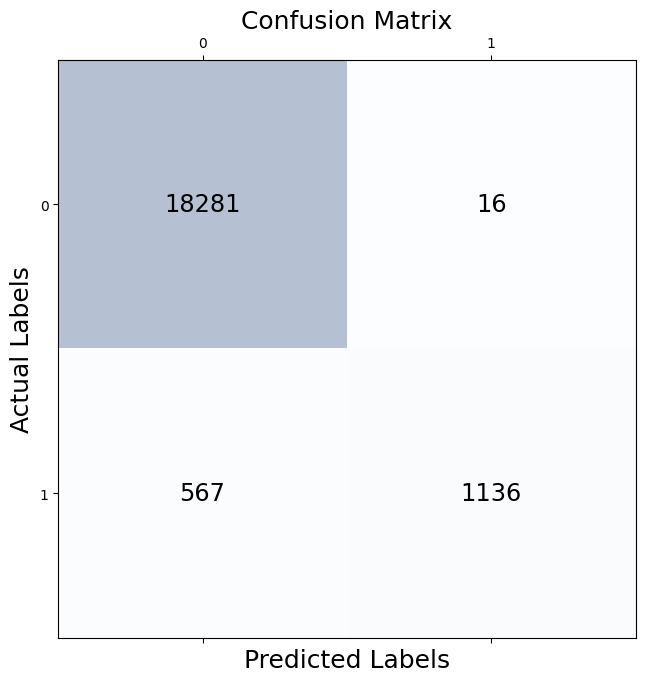

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Ensure y_pred and y_test are NumPy arrays
y_pred_np = y_pred.numpy()
y_test_np = y_test_tensor.numpy()

# Compute confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test_np, y_pred_np)
print(conf_matrix)

acc = accuracy_score(y_test_np, y_pred_np)
print(f"Accuracy: {acc:.4f}")

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j],
                va='center', ha='center', size='xx-large')

plt.xlabel('Predicted Labels', fontsize=18)
plt.ylabel('Actual Labels', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
